<a href="https://colab.research.google.com/github/umangjpatel/g20-machine-learning/blob/main/Best_RN18_224_Unfreeze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! [ -e /content ] && pip install -Uqq fastai
! pip install kaggle

     |████████████████████████████████| 194kB 17.5MB/s 
     |████████████████████████████████| 12.8MB 198kB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 776.8MB 22kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.


In [3]:
from google.colab import files
from pathlib import Path
kaggle_key = (Path(".")) / "kaggle.json"
if not kaggle_key.exists():
  uploaded = files.upload()
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [4]:
!kaggle datasets download umangjpatel/sipakmed-wsi -p="dataset" --unzip 

100% 6.00G/6.01G [02:11<00:00, 60.3MB/s]
100% 6.01G/6.01G [02:11<00:00, 49.1MB/s]


In [5]:
from fastai.vision.all import *
root_path = Path(".")
dataset_path = root_path / "dataset"

print("Categories\t\t  | # of images")
print("-" * 40)
for d in dataset_path.iterdir():
  img_count = len([x for x in d.iterdir() if x.is_file() and x.suffix == ".bmp"])
  spaces = " " if "_" in d.name else "\t\t "
  print(f"{d.name}{spaces} | {img_count}")

Categories		  | # of images
----------------------------------------
dyskeratotic		  | 223
parabasal		  | 108
superficial_intermediate  | 126
koilocytotic		  | 238
metaplastic		  | 271


In [6]:
root_path.ls()

(#3) [Path('.config'),Path('dataset'),Path('sample_data')]

In [7]:
dataset_path.ls()

(#5) [Path('dataset/dyskeratotic'),Path('dataset/parabasal'),Path('dataset/superficial_intermediate'),Path('dataset/koilocytotic'),Path('dataset/metaplastic')]

In [8]:
dls = ImageDataLoaders.from_folder(path = dataset_path, valid_pct=0.2, 
                                   item_tfms=Resize(224),
                                   batch_tfms = aug_transforms(size = 224, 
                                                               max_zoom=0.0, 
                                                               max_lighting= 0.0, 
                                                               do_flip = False, 
                                                               align_corners=False),
                                   bs = 64,
                                   seed = 0)
dls            

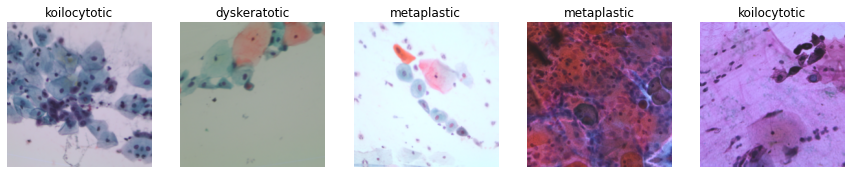

In [9]:
dls.show_batch(nrows = 1, ncols = 5)

In [10]:
learn = cnn_learner(dls, resnet18, metrics = [accuracy, error_rate])

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [11]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.443955,1.039879,0.590674,0.409326,03:49
1,1.724409,0.668124,0.782383,0.217617,03:42
2,1.321564,0.625774,0.772021,0.227979,03:18
3,1.061996,0.619784,0.787565,0.212435,03:05
4,0.899470,0.616725,0.777202,0.222798,02:57


In [12]:
learn.unfreeze()

SuggestedLRs(lr_min=0.00020892962347716094, lr_steep=2.75422871709452e-06)

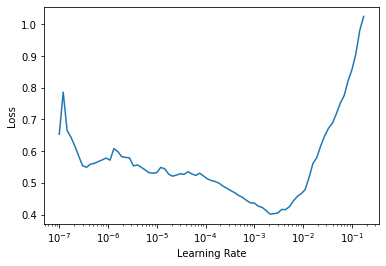

In [15]:
learn.lr_find()

In [16]:
learn.fit(10, lr = 2e-04)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.426169,0.460404,0.844560,0.155440,01:06
1,0.319743,0.418285,0.865285,0.134715,01:13
2,0.262017,0.368124,0.886010,0.113990,02:53
3,0.200563,0.284507,0.901554,0.098446,02:57
4,0.158762,0.179562,0.937824,0.062176,02:51
5,0.126867,0.180776,0.948187,0.051813,02:34
6,0.102063,0.284835,0.922280,0.077720,02:35
7,0.092273,0.229718,0.932642,0.067358,02:41
8,0.078849,0.272078,0.922280,0.077720,02:54
9,0.069158,0.202870,0.932642,0.067358,02:53


In [24]:
learn.export(fname="best_rn18.pth")

In [35]:
learn = load_learner(dls, dataset_path/"best_rn18.pkl")

AttributeError: ignored

In [33]:
learn.unfreeze()

In [34]:
learn.lr_find()

ZeroDivisionError: ignored